Import des librairies et dataset

In [73]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 



df_hist = pd.read_csv("./../data/raw/weatherAUS.csv")
df_villes = pd.read_csv("./../data/raw/villes.csv", sep = ";")
df_stat_vent = pd.read_csv("./../data/raw/df_stat_vent.csv")
# Ajout des colonnes Etat et Climat
df_meteo = df_hist.merge(df_villes, right_on='Ville', left_on='Location')
df_meteo = df_meteo.drop(columns = 'Ville') 

# Découpage de la date en 3 colonnes
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'], yearfirst = True)
df_meteo["Year"] = df_meteo["Date"].dt.strftime("%Y")
df_meteo["Month"] = df_meteo["Date"].dt.strftime("%m")
df_meteo["Day"] = df_meteo["Date"].dt.strftime("%d")


Distribution des directions

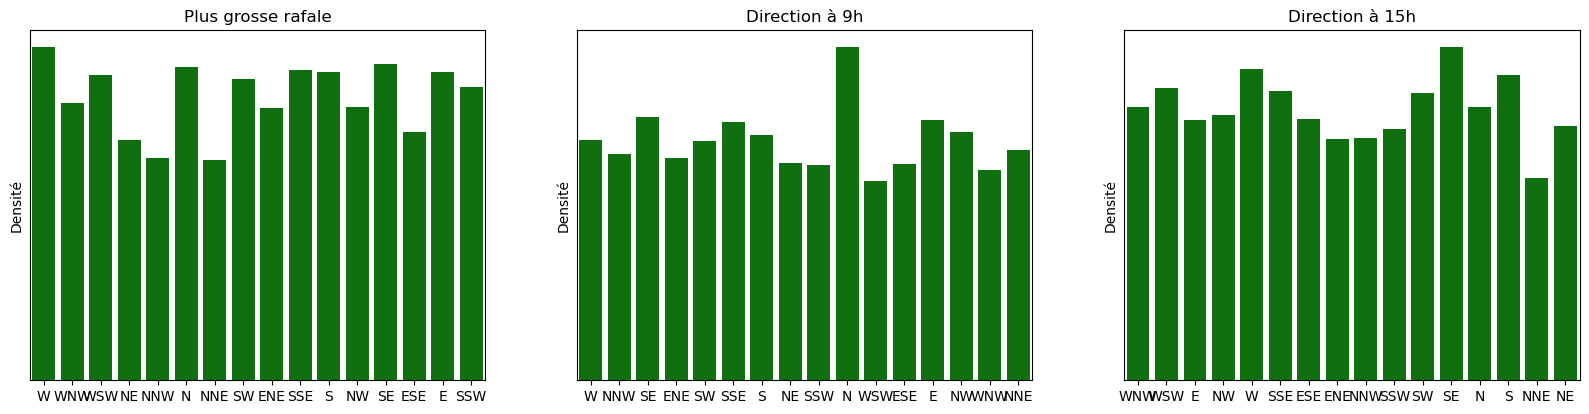

In [70]:
list_col = ["WindGustDir", "WindDir9am", "WindDir3pm"]
list_label = ["Plus grosse rafale", "Direction à 9h", "Direction à 15h"]
fig = plt.figure(figsize = (20, 10))
i=1
for col, label in zip(list_col, list_label) : 
    plt.subplot(2, 3, i)
    i += 1
    sns.countplot(x=df_meteo[col],  color = 'g')
    
    plt.title(label)
    plt.yticks([])        
    plt.ylabel("Densité")
    plt.xlabel("")


plt.show()

In [74]:

import plotly.express as px

fig = px.scatter_polar(df_stat_vent, r="WindGustDir", theta="Direction")
fig.show()

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3])

px.line_polar(df, r="WindGustDir", theta="Direction",  line_close=True)

fig.add_trace(go.Scatterpolar( name = "Direction de la plus grosse rafale de vent",  r=df_stat_vent["WindGustDir"], theta=df_stat_vent["Direction"] ), 1, 1)
fig.add_trace(go.Scatterpolar( name = "Direction du vent à 9h00",  r=df_stat_vent["WindDir9am"], theta=df_stat_vent["Direction"] ), 1, 2)
fig.add_trace(go.Scatterpolar( name = "Direction du vent à 15h00",  r=df_stat_vent["WindDir3pm"], theta=df_stat_vent["Direction"] ), 1, 3)

fig.update_traces(fill='toself')

fig.update_layout(
    polar1 = dict(
      radialaxis_angle = 90,
      angularaxis = dict(
        direction = "clockwise")
    ),
     polar2 = dict(
      radialaxis_angle = 90,
      angularaxis = dict(
        direction = "clockwise")
    ),
      polar3 = dict(
      radialaxis_angle = 90,
      angularaxis = dict(
        direction = "clockwise")
    )
)

fig.show()

